Ошибка подключения к сайту https://permtech.ru/. Повторный запрос.
Ошибка подключения к сайту https://news.perm.ru/. Повторный запрос.
Ошибка подключения к сайту https://www.permstroi.ru/. Повторный запрос.
https://pstu.ru/: 1 упоминаний
http://perm.bezformata.com/: 0 упоминаний
https://perm.aif.ru/: 0 упоминаний
https://perm.mk.ru/: 0 упоминаний
https://www.59.ru/: 0 упоминаний
https://properm.ru/: 0 упоминаний
https://perm.hse.ru/: 0 упоминаний
http://itas.pstu.ru/: 5 упоминаний
https://pstu.ru/search/?searchid=2741290&text=%D0%B8%D1%82%D0%B0%D1%81: 2 упоминаний


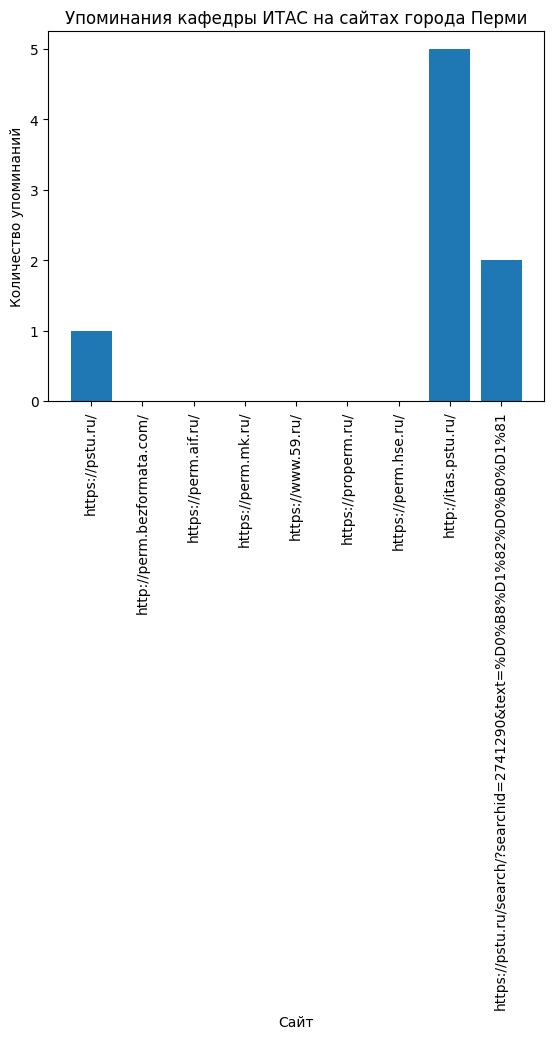

In [12]:
import requests
from requests.exceptions import RequestException
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

websites = [
    'https://pstu.ru/',
    'http://perm.bezformata.com/',
    'https://perm.aif.ru/',
    'https://perm.mk.ru/',
    'https://www.59.ru/',
    'https://properm.ru/',
    'https://permtech.ru/',
    'https://news.perm.ru/',
    'https://www.permstroi.ru/',
    'https://perm.hse.ru/',
    'http://itas.pstu.ru/',
    'https://pstu.ru/search/?searchid=2741290&text=%D0%B8%D1%82%D0%B0%D1%81'
]

#keyword = 'Информационные технологии и автоматизированные системы'
#keyword = 'Кафедра информационные технологии и автоматизированные системы'
keyword = 'ИТАС'

mentions = {}

for url in websites:
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        text = soup.get_text().lower()
        mentions[url] = text.count(keyword.lower())
    except RequestException as e:
        print(f"Ошибка подключения к сайту {url}. Повторный запрос.")
        continue
    
for url, count in mentions.items():
    print(f'{url}: {count} упоминаний')

plt.bar(range(len(mentions)), list(mentions.values()), align='center')
plt.xticks(range(len(mentions)), list(mentions.keys()), rotation='vertical')
plt.xlabel('Сайт')
plt.ylabel('Количество упоминаний')
plt.title('Упоминания кафедры ИТАС на сайтах города Перми')
plt.show()